### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
df = pd.read_csv(r"C:\Users\Ananta Arora\Documents\data\Mall_Customers.csv")

In [3]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Select the annual income and the spending score columns 
X = df.iloc[:, [3,4]].values

Text(0.5, 1.0, 'Visualization of raw data')

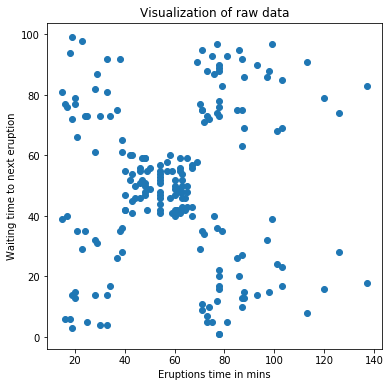

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:,3], df.iloc[:,4])
plt.xlabel('Eruptions time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data')

In [6]:
# Standardize the data
X_std = StandardScaler().fit_transform(X)
X_std

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

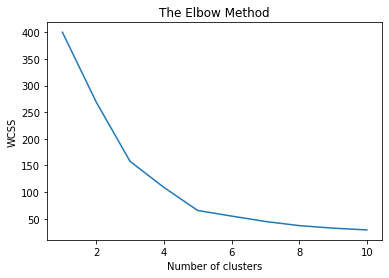

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter=300, n_init=10, random_state = 0)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

In [11]:
# Run local implementation of kmeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10, random_state = 0)
km.fit(X_std)
print("centroids: ", km.cluster_centers_)
print("labels: ", km.labels_)

centroids:  [[ 1.05500302 -1.28443907]
 [-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [-1.30751869 -1.13696536]]
labels:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [18]:
# We can find labels directly using fit_predict
y_kmeans = km.fit_predict(X_std)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [12]:
import numpy as np
my_dict = {km.cluster_centers_[i, 0]: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}
my_dict

{1.0550030223077878: array([124, 128, 130, 134, 136, 138, 140, 144, 146, 148, 150, 152, 154,
        156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
        182, 184, 186, 188, 190, 192, 194, 196, 198], dtype=int64),
 -0.20091256569971447: array([ 43,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        126, 132, 142], dtype=int64),
 0.9915830476839198: array([123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147,
        149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173,
        175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199],
       dtype=int64),
 -1.329

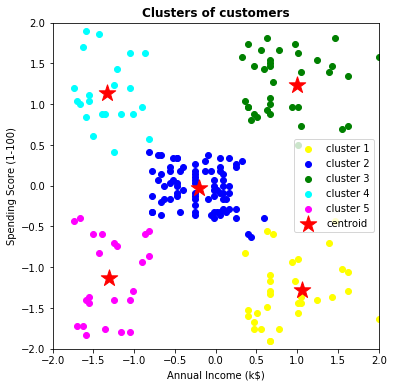

In [19]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='yellow', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='green', label='cluster 3')
plt.scatter(X_std[km.labels_ == 3, 0], X_std[km.labels_ == 3, 1],
            c='cyan', label='cluster 4')
plt.scatter(X_std[km.labels_ == 4, 0], X_std[km.labels_ == 4, 1],
            c='magenta', label='cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of customers', fontweight='bold')
ax.set_aspect('equal')

**From the above output image, some following conclusions are made:**

- Cluster 1: Clients in cluster 1 have high income and low spending score, which means that the clients in this cluster earns a very high income but don’t spend enough money. So, the clients can be named as Careful.
- Cluster 2: Clients in this cluster have an average salary and average spending score. So, these clusters of clients are Standard.
- Cluster 3: It consists of clients with high income and high spending scores, which means this cluster is supposed to be the main potential of mall marketing to understand what sort of products are being purchased by the clients. So, we can name it as Target.  
- Cluster 4: The next cluster is of low income but high spending score clients, and so they can be called as Careless.
- Cluster 5: The last cluster is of clients with low income and low spending score, which means that they are the Sensible ones.